# COVID-19 Growth
Adapted from https://nextjournal.com/mpd/covid-19-growth-by-state-us

In [1]:
# Standard libraries and options
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
pd.options.display.float_format = '{:,.2f}'.format


In [274]:
#pd.describe_option('display')

In [2]:
# Download states by day as JSON. Skip this cell to avoid making more requests than needed.  
states_url = "https://covidtracking.com/api/states/daily"
r = requests.get(states_url)

In [3]:
# Convert JSON to pandas DataFrame.
states_df = pd.DataFrame(r.json())
states_df['date'] = pd.to_datetime(states_df.date, format="%Y%m%d")
states_df.drop(['checkTimeEt', 'commercialScore', 'dataQualityGrade', 'dateChecked', 'dateModified', 'grade', 'hash', 'positiveScore', 'score'], axis = 1, inplace=True)
states_df.head()

,date,death,deathIncrease,fips,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,state,total,totalTestResults,totalTestResultsIncrease,totalTestsViral
0,2020-07-06,16.00,0,02,nan,nan,19.00,0,nan,nan,...,"1,138.00",nan,0,nan,548.00,AK,123753,123753,0,"123,753.00"
1,2020-07-06,"1,007.00",0,01,"2,914.00","2,914.00","1,016.00",5,843.00,nan,...,"44,878.00","44,375.00",925,nan,"22,082.00",AL,455095,455095,5209,nan
2,2020-07-06,292.00,6,05,"1,575.00","1,575.00",337.00,39,nan,nan,...,"24,253.00","24,253.00",1044,nan,"17,834.00",AR,344968,344968,6075,"344,529.00"
3,2020-07-06,0.00,0,60,nan,nan,nan,0,nan,nan,...,0.00,nan,0,nan,nan,AS,696,696,0,nan
4,2020-07-06,"1,810.00",1,04,"5,188.00","5,188.00","3,212.00",27,nan,839.00,...,"101,441.00",nan,3352,nan,"11,836.00",AZ,617841,617841,13479,"617,343.00"


In [244]:
states_df.describe().T

,count,mean,std,min,25%,50%,75%,max
death,"6,151.00","1,200.42","3,051.87",0.00,19.00,183.00,900.00,"24,904.00"
deathIncrease,"6,849.00",17.91,57.16,-213.00,0.00,3.00,14.00,"1,877.00"
hospitalized,"3,486.00","4,546.45","13,110.11",0.00,241.00,"1,059.00","3,519.75","89,995.00"
hospitalizedCumulative,"3,486.00","4,546.45","13,110.11",0.00,241.00,"1,059.00","3,519.75","89,995.00"
hospitalizedCurrently,"4,262.00",948.49,"1,839.02",0.00,95.00,374.00,906.00,"18,825.00"
hospitalizedIncrease,"6,849.00",36.32,289.11,"-4,124.00",0.00,0.00,16.00,"16,373.00"
inIcuCumulative,917.00,661.35,574.76,6.00,182.00,489.00,992.00,"2,429.00"
inIcuCurrently,"2,190.00",412.33,686.01,0.00,68.00,159.00,418.00,"5,225.00"
negative,"6,645.00","184,242.07","386,959.96",0.00,"8,141.00","54,299.00","196,351.00","4,419,983.00"
negativeIncrease,"6,849.00","4,764.33","9,889.68","-74,880.00",123.00,"1,508.00","5,268.00","163,092.00"


In [4]:
states_df.info() # provides more info than states_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 30 columns):
date                        6905 non-null datetime64[ns]
death                       6207 non-null float64
deathIncrease               6905 non-null int64
fips                        6905 non-null object
hospitalized                3522 non-null float64
hospitalizedCumulative      3522 non-null float64
hospitalizedCurrently       4312 non-null float64
hospitalizedIncrease        6905 non-null int64
inIcuCumulative             928 non-null float64
inIcuCurrently              2217 non-null float64
lastUpdateEt                6659 non-null object
negative                    6747 non-null float64
negativeIncrease            6905 non-null int64
negativeRegularScore        6905 non-null int64
negativeScore               6905 non-null int64
negativeTestsViral          659 non-null float64
onVentilatorCumulative      326 non-null float64
onVentilatorCurrently       1933 non-null float64
p

In [8]:
def get_std_formats (df, int_format = '{0:,.0f}', float_format =  '{:,.2f}', date_format = '{:%m/%d/%Y}') :

    dt_map = {'datetime64[ns]' : date_format, 'float64' : float_format, 'int64': int_format}

    return {n : dt_map[df.dtypes[n].name] for n in df.dtypes.index if df.dtypes[n].name in ([
    'datetime64[ns]', 'float64', 'int64'])}


In [9]:
states_fmts = get_std_formats(states_df)
states_df.tail().style.format(states_fmts)
#states_fmts

,date,death,deathIncrease,fips,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,lastUpdateEt,negative,negativeIncrease,negativeRegularScore,negativeScore,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,pending,posNeg,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,state,total,totalTestResults,totalTestResultsIncrease,totalTestsViral
6900,01/26/2020,nan,0,53,nan,nan,nan,0,nan,nan,None,0.00,0,0,0,nan,nan,nan,nan,2,2.00,nan,0,nan,nan,WA,2,2,0,nan
6901,01/25/2020,nan,0,53,nan,nan,nan,0,nan,nan,None,0.00,0,0,0,nan,nan,nan,nan,2,2.00,nan,0,nan,nan,WA,2,2,0,nan
6902,01/24/2020,nan,0,53,nan,nan,nan,0,nan,nan,None,0.00,0,0,0,nan,nan,nan,nan,2,2.00,nan,0,nan,nan,WA,2,2,0,nan
6903,01/23/2020,nan,0,53,nan,nan,nan,0,nan,nan,None,0.00,0,0,0,nan,nan,nan,nan,2,2.00,nan,0,nan,nan,WA,2,2,0,nan
6904,01/22/2020,nan,0,53,nan,nan,nan,0,nan,nan,None,0.00,0,0,0,nan,nan,nan,nan,2,2.00,nan,0,nan,nan,WA,2,2,0,nan


# NJ Adjustment

The COVID Tracking Project [notes](https://covidtracking.com/data/state/new-jersey) that
"on June 25th, New Jersey reported 1854 probable deaths that occured in the past. This causes a perecived increase in the daily number of deaths."

We will subtract these for the time being, but it would be better to reallocate to past dates.



In [10]:
condition = (states_df['date']=='2020-06-25') & (states_df['state']=='NJ') 
adj_nj_incr = states_df.loc[condition]['deathIncrease'] - 1854
adj_nj_incr

650    23
Name: deathIncrease, dtype: int64

In [11]:
states_df.loc[condition, ['deathIncrease']] = adj_nj_incr
#states_df.loc[condition]

# Sort and add moving averages

In [12]:
# Sort values for moving average over state and date and calculate moving averages.
states_df.sort_values(by=['state', 'date'], inplace=True)
states_df['percentPositive'] = states_df['positiveIncrease'] / states_df['totalTestResultsIncrease']  
movingAvg7Day = lambda x : x.rolling(7).mean()
states_avg = states_df.groupby('state', group_keys=False)['deathIncrease', 'positiveIncrease','percentPositive', 'hospitalizedCurrently', 'hospitalizedIncrease'].apply(movingAvg7Day)
#states_avg.tail()

In [13]:
# add the calculated moving averages into states_df
states_df = states_df.join(states_avg, rsuffix='Average')
#states_df.tail(5)

In [14]:
case_cols = ['date','positiveIncrease', 'positiveIncreaseAverage', 'deathIncrease', 'deathIncreaseAverage', 'percentPositive', 'percentPositiveAverage', 'hospitalizedCurrently', 'hospitalizedCurrentlyAverage', 'hospitalizedIncrease', 'hospitalizedIncreaseAverage']

nj_cases = states_df.loc[states_df['state']=='NJ', case_cols]

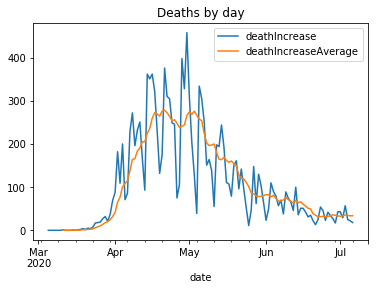

In [15]:
nj_cases.plot(x='date', y=['deathIncrease', 'deathIncreaseAverage'], title='Deaths by day')

In [17]:
nj_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
370,2020-06-30,395,276.14,43,33.14,0.02,0.01,992.00,"1,083.29",0,47.86
314,2020-07-01,261,290.86,43,32.71,0.01,0.01,"1,080.00","1,066.71",207,65.14
258,2020-07-02,428,308.57,29,33.57,0.02,0.01,"1,027.00","1,044.57",87,67.57
202,2020-07-03,386,308.29,57,35.71,0.02,0.02,"1,028.00","1,031.71",73,66.00
146,2020-07-04,291,308.57,25,34.43,0.01,0.02,983.00,"1,014.57",19,58.57
90,2020-07-05,369,317.14,22,33.71,0.01,0.01,917.00,"1,000.71",4,56.57
34,2020-07-06,209,334.14,18,33.86,0.01,0.02,861.00,984.00,0,55.71


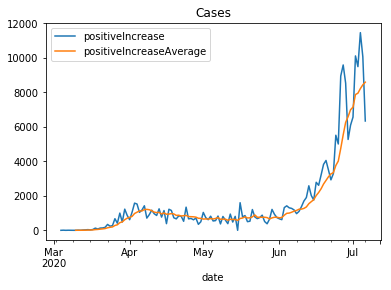

In [18]:
fl_cases = states_df.loc[states_df['state']=='FL', case_cols]
fl_cases.plot(x='date', y=[ 'positiveIncrease', 'positiveIncreaseAverage'], title='Cases')

In [20]:
fl_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
346,2020-06-30,6093,"6,990.14",58,38.71,0.19,0.17,nan,nan,228,180.71
290,2020-07-01,6563,"7,140.43",46,39.00,0.19,0.16,nan,nan,246,180.00
234,2020-07-02,10109,"7,869.71",68,42.14,0.20,0.18,nan,nan,329,198.00
178,2020-07-03,9488,"7,947.71",67,45.86,0.19,0.18,nan,nan,341,216.29
122,2020-07-04,11458,"8,215.29",18,44.86,0.18,0.18,nan,nan,245,229.71
66,2020-07-05,10059,"8,433.71",29,44.86,0.19,0.19,nan,nan,161,237.29
10,2020-07-06,6336,"8,586.57",48,47.71,0.19,0.19,nan,nan,151,243.00


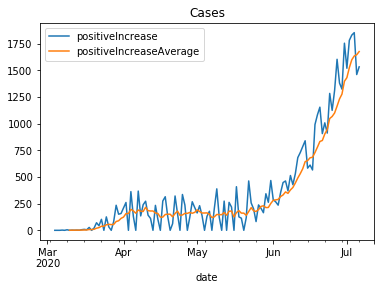

In [21]:
sc_cases = states_df.loc[states_df['state']=='SC', case_cols]
sc_cases.plot(x='date', y=[ 'positiveIncrease', 'positiveIncreaseAverage'], title='Cases')

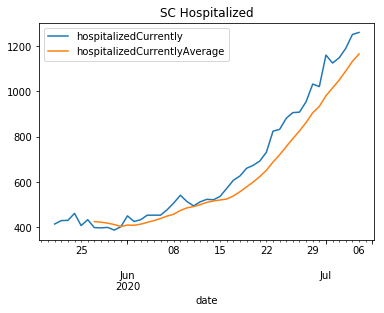

In [22]:
sc_cases.plot(x='date', y=[ 'hospitalizedCurrently', 'hospitalizedCurrentlyAverage'], title='SC Hospitalized')

In [23]:
sc_cases.tail(7)

,date,positiveIncrease,positiveIncreaseAverage,deathIncrease,deathIncreaseAverage,percentPositive,percentPositiveAverage,hospitalizedCurrently,hospitalizedCurrentlyAverage,hospitalizedIncrease,hospitalizedIncreaseAverage
380,2020-06-30,1755,"1,398.00",19,9.43,0.16,0.25,"1,021.00",933.43,232,68.14
324,2020-07-01,1520,"1,431.71",27,11.86,0.16,0.26,"1,160.00",980.29,0,68.14
268,2020-07-02,1782,"1,525.57",18,13.00,0.15,0.27,"1,125.00","1,015.14",0,68.14
212,2020-07-03,1831,"1,599.57",9,14.14,0.24,0.16,"1,148.00","1,049.71",28,37.14
156,2020-07-04,1854,"1,635.29",20,14.57,0.16,0.17,"1,190.00","1,090.00",0,37.14
100,2020-07-05,1461,"1,646.71",7,14.86,0.14,0.17,"1,251.00","1,132.43",0,37.14
44,2020-07-06,1533,"1,676.57",7,15.29,0.17,0.17,"1,260.00","1,165.00",0,37.14


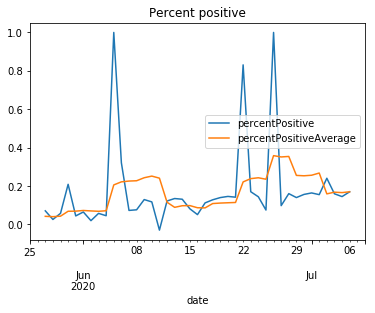

In [24]:
sc_cases[sc_cases['date']>= '2020-05-27'].plot(x='date', y=[ 'percentPositive', 'percentPositiveAverage'], title='Percent positive')

Text(0,0.5,'Deaths (7-day average)')

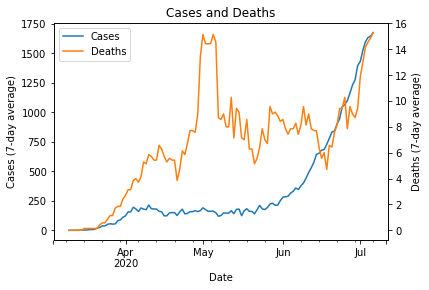

In [25]:
ax = sc_cases.plot(x='date', y='positiveIncreaseAverage', title='Cases and Deaths', label='Cases')
sc_cases.plot(x='date', y='deathIncreaseAverage', ax=ax, secondary_y=True, label='Deaths', mark_right=False)
ax.set(xlabel="Date", ylabel="Cases (7-day average)")
ax.right_ax.set_ylabel('Deaths (7-day average)')


# Population adjustment

Latest census CSV contains FIPS code for state and 2019 estimates.

`http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv?#`

Source:[State Population Totals and Components of Change: 2010-2019](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage)

In [26]:
pop_url = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv?#'
pop_df = pd.read_csv(pop_url, dtype={'STATE': 'object'})
# We only want the state-level rows (40) and 2019 data. 
pop_df = pop_df.loc[(pop_df['SUMLEV'] == 40), ['STATE', 'NAME','POPESTIMATE2019']]

# rename state to fips for merge
pop_df.columns = ['fips', 'stateName', 'population']


In [27]:
# Get the latest date in the data set.
latest = states_df['date'].max()
latest

Timestamp('2020-07-06 00:00:00')

In [28]:
#  %%timeit=2.49 ms 
latest_df = states_df.loc[states_df['date'] == latest]

In [29]:
latest_df = latest_df.merge(pop_df, on=['fips'])

In [30]:
latest_df['positiveAvgPerCap'] = latest_df['positiveIncreaseAverage'] / (latest_df['population'] / 1000000)
latest_df['deathAvgPerCap'] = latest_df['deathIncreaseAverage'] / (latest_df['population'] / 1000000)
latest_df['hospitalizedPerCap'] = latest_df['hospitalizedCurrentlyAverage'] / (latest_df['population'] / 1000000)
latest_df['hospIncrPerCap'] = latest_df['hospitalizedIncreaseAverage'] / (latest_df['population'] / 1000000)
#latest_df.head(5)

In [31]:
latest_df[['stateName','positiveAvgPerCap', 'population', 'positiveIncreaseAverage', 'positiveIncrease']
    ].nlargest(10, 'positiveAvgPerCap').sort_values('positiveAvgPerCap', ascending=False)

,stateName,positiveAvgPerCap,population,positiveIncreaseAverage,positiveIncrease
3,Arizona,528.12,7278717,"3,844.00",3352
9,Florida,399.79,21477737,"8,586.57",6336
41,South Carolina,325.63,5148714,"1,676.57",1533
18,Louisiana,284.13,4648794,"1,320.86",1101
10,Georgia,237.44,10617423,"2,521.00",1548
44,Texas,234.25,28995881,"6,792.29",5318
33,Nevada,232.59,3080156,716.43,491
25,Mississippi,225.12,2976149,670.00,357
1,Alabama,224.43,4903185,"1,100.43",925
43,Tennessee,206.22,6829174,"1,408.29",724


In [32]:
latest_df[['stateName','positiveIncreaseAverage', 'positiveIncrease']
         ].nlargest(20, 'positiveIncreaseAverage').sort_values('positiveIncreaseAverage', ascending=False)

,stateName,positiveIncreaseAverage,positiveIncrease
9,Florida,"8,586.57",6336
4,California,"7,876.29",11529
44,Texas,"6,792.29",5318
3,Arizona,"3,844.00",3352
10,Georgia,"2,521.00",1548
41,South Carolina,"1,676.57",1533
27,North Carolina,"1,577.86",1546
43,Tennessee,"1,408.29",724
18,Louisiana,"1,320.86",1101
1,Alabama,"1,100.43",925


In [33]:
latest_df[['stateName','hospitalizedPerCap', 'population', 'hospitalizedCurrently']
         ].nlargest(20, 'hospitalizedPerCap').sort_values('hospitalizedPerCap', ascending=False)

,stateName,hospitalizedPerCap,population,hospitalizedCurrently
3,Arizona,414.65,7278717,"3,212.00"
25,Mississippi,281.28,2976149,825.00
44,Texas,262.30,28995881,"8,698.00"
41,South Carolina,226.27,5148714,"1,260.00"
33,Nevada,224.76,3080156,748.00
18,Louisiana,184.81,4648794,964.00
4,California,175.11,39512223,"7,278.00"
1,Alabama,172.74,4903185,"1,016.00"
10,Georgia,159.33,10617423,"1,962.00"
7,District of Columbia,150.80,705749,88.00


In [34]:

hosp_df = latest_df[['stateName','hospIncrPerCap', 'population', 'hospitalizedIncreaseAverage', 'hospitalizedIncrease']
         ].nlargest(20, 'hospIncrPerCap').sort_values('hospIncrPerCap', ascending=False)
hosp_df = hosp_df.rename({'stateName' : 'State',  'hospIncrPerCap' : 'Hospitalizations per mil., 7-day avg.' ,
               'population' : 'Population', 'hospitalizedIncreaseAverage' : 'Hospitalizations, 7-day avg.', 
               'hospitalizedIncrease' : 'Hospitalizations'}, axis=1)
hosp_df.index = np.arange(1, len(hosp_df) + 1)

hosp_df.style.\
    format(get_std_formats(hosp_df)).\
    set_properties(subset=['State'], **{'text-align': 'left'}).\
    set_table_styles([dict(selector="th",props=[('max-width', '10em'), ('vertical-align' , 'bottom')]),
                     dict(selector="thead tr:first-of-type th:nth-of-type(2)",props=[('text-align', 'left')])])
#hosp_df.to_html()


,State,"Hospitalizations per mil., 7-day avg.",Population,"Hospitalizations, 7-day avg.",Hospitalizations
1,Georgia,14.73,"10,617,423",156.43,144
2,Virginia,12.87,"8,535,519",109.86,16
3,Florida,11.31,"21,477,737",243.00,151
4,Arizona,10.87,"7,278,717",79.14,27
5,New Mexico,9.61,"2,096,829",20.14,18
6,Arkansas,9.23,"3,017,804",27.86,39
7,Utah,8.33,"3,205,958",26.71,22
8,Mississippi,7.92,"2,976,149",23.57,12
9,Oklahoma,7.22,"3,956,971",28.57,4
10,South Carolina,7.21,"5,148,714",37.14,0
